In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as hie
from sklearn.preprocessing import StandardScaler
%pip install kneed
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

## Data Preparation & Data cleaning

In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/eabigails/DM/refs/heads/main/amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [38]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [39]:
df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   object 
 4   actual_price         1465 non-null   object 
 5   discount_percentage  1465 non-null   object 
 6   rating               1465 non-null   object 
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [40]:
# Mengatasi missing value pada rating count dengan mengisinya dengan rata-rata
df['rating_count'] = df['rating_count'].fillna(df['rating_count'].mean())

In [41]:
df.duplicated().any()

False

In [42]:
df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

In [43]:
# Changing Datatype and values in Discount Percentage

df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')

# Mengambil dua digit di belakang ,
df['discounted_price_encoded'] = (df['discounted_price'].astype(float) * 100).astype(int)

In [44]:
# Memastikan apakah data yang kita ganti sudah sesuai.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_id                1465 non-null   object 
 1   product_name              1465 non-null   object 
 2   category                  1465 non-null   object 
 3   discounted_price          1465 non-null   float64
 4   actual_price              1465 non-null   float64
 5   discount_percentage       1465 non-null   float64
 6   rating                    1465 non-null   object 
 7   rating_count              1465 non-null   float64
 8   about_product             1465 non-null   object 
 9   user_id                   1465 non-null   object 
 10  user_name                 1465 non-null   object 
 11  review_id                 1465 non-null   object 
 12  review_title              1465 non-null   object 
 13  review_content            1465 non-null   object 
 14  img_link

In [45]:
# Menghaspu kolum yang tidak berkaitan
df_cleaned = df.drop(columns=['user_id','review_id','img_link','product_link','user_name','review_content','review_title'])

In [46]:
df_cleaned.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'discounted_price_encoded'],
      dtype='object')

In [47]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_id                1465 non-null   object 
 1   product_name              1465 non-null   object 
 2   category                  1465 non-null   object 
 3   discounted_price          1465 non-null   float64
 4   actual_price              1465 non-null   float64
 5   discount_percentage       1465 non-null   float64
 6   rating                    1465 non-null   object 
 7   rating_count              1465 non-null   float64
 8   about_product             1465 non-null   object 
 9   discounted_price_encoded  1465 non-null   int32  
dtypes: float64(4), int32(1), object(5)
memory usage: 108.9+ KB


## EDA

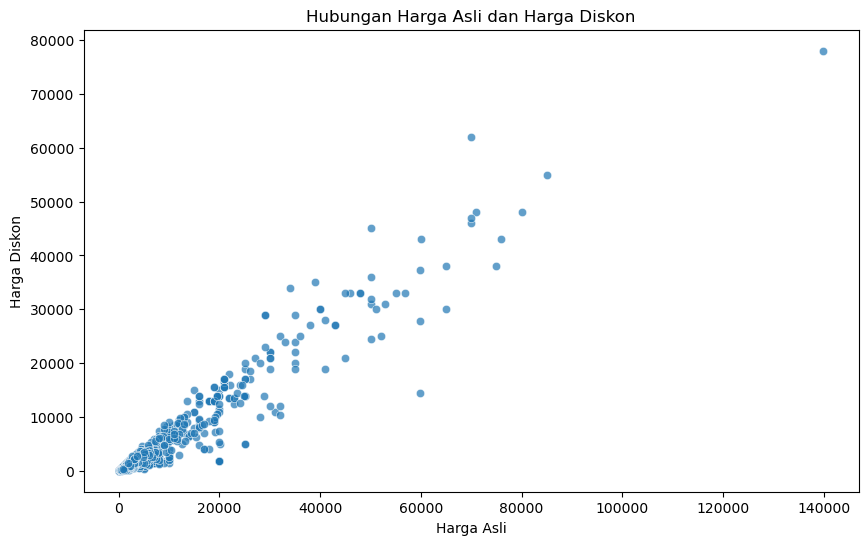

In [48]:
# Scatter plot untuk harga asli dan harga diskon
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='discounted_price', data=df_cleaned, alpha=0.7)
plt.title('Hubungan Harga Asli dan Harga Diskon')
plt.xlabel('Harga Asli')
plt.ylabel('Harga Diskon')
plt.show()


Top 5 Kategori berdasarkan jumlah produk:
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables    233
Electronics|WearableTechnology|SmartWatches                                           76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                  68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                         63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                          52
Name: category, dtype: int64


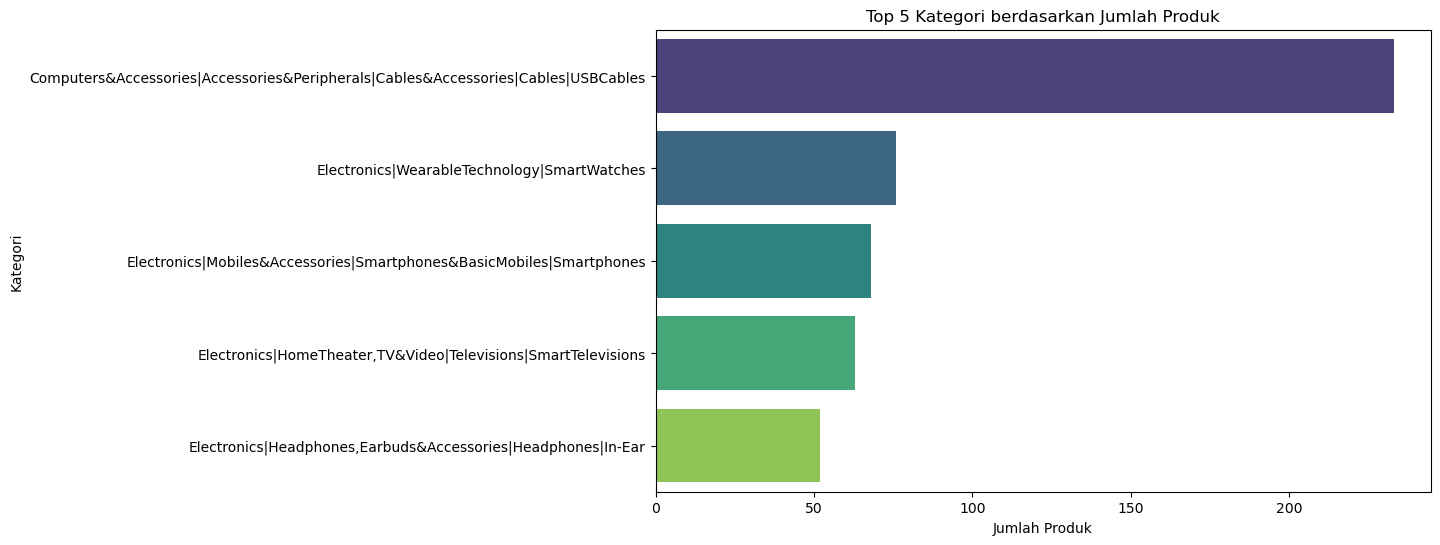

In [49]:
# Menghitung jumlah produk per kategori
top_categories = df['category'].value_counts().head(5)

# Menampilkan hasil
print("Top 5 Kategori berdasarkan jumlah produk:")
print(top_categories)

# Visualisasi Bar Chart untuk Top 5 Kategori
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 5 Kategori berdasarkan Jumlah Produk')
plt.xlabel('Jumlah Produk')
plt.ylabel('Kategori')
plt.show()

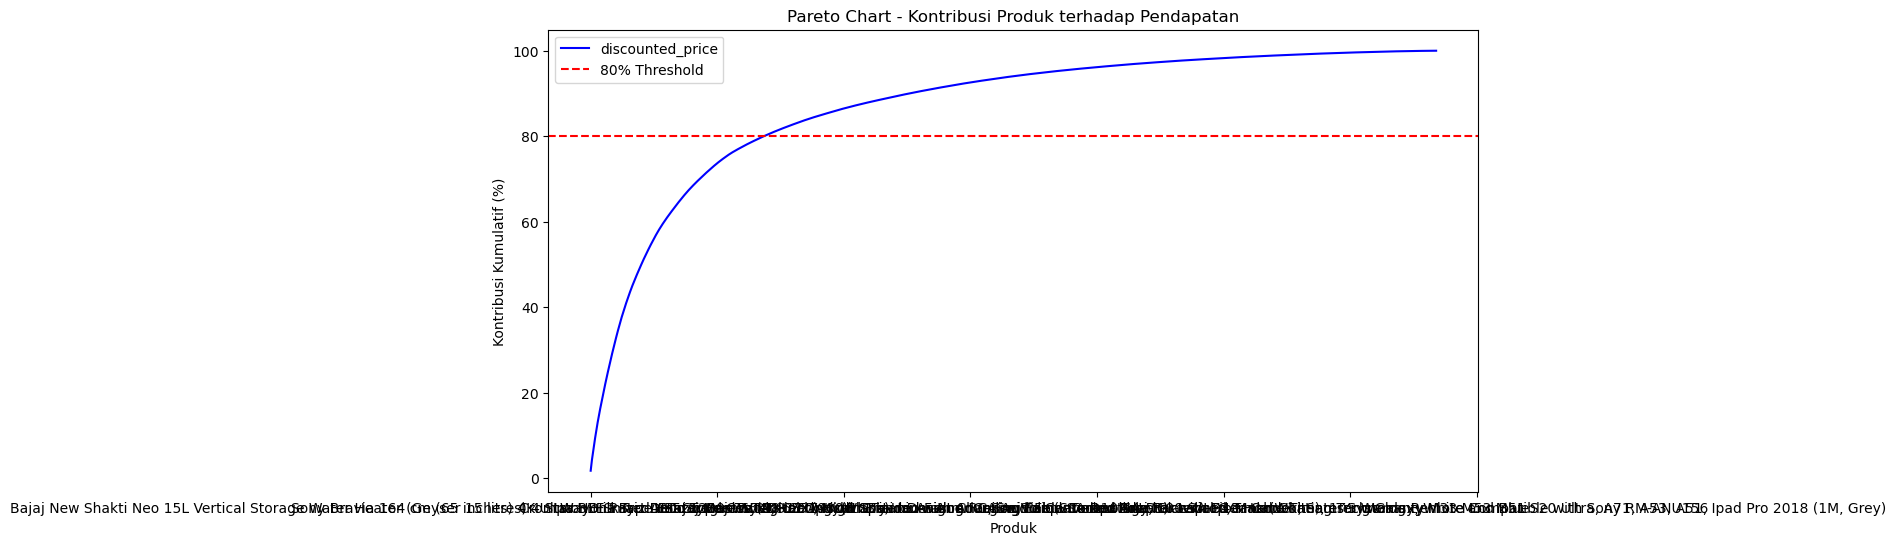

In [50]:
# Pareto Chart untuk 20% produk dengan kontribusi terbesar
top_products = df.groupby('product_name')['discounted_price'].sum().sort_values(ascending=False).cumsum()
total_revenue = top_products.iloc[-1]
pareto = (top_products / total_revenue) * 100

plt.figure(figsize=(12, 6))
pareto.plot(kind='line', color='blue')
plt.axhline(80, color='red', linestyle='--', label='80% Threshold')
plt.title('Pareto Chart - Kontribusi Produk terhadap Pendapatan')
plt.xlabel('Produk')
plt.ylabel('Kontribusi Kumulatif (%)')
plt.legend()
plt.show()

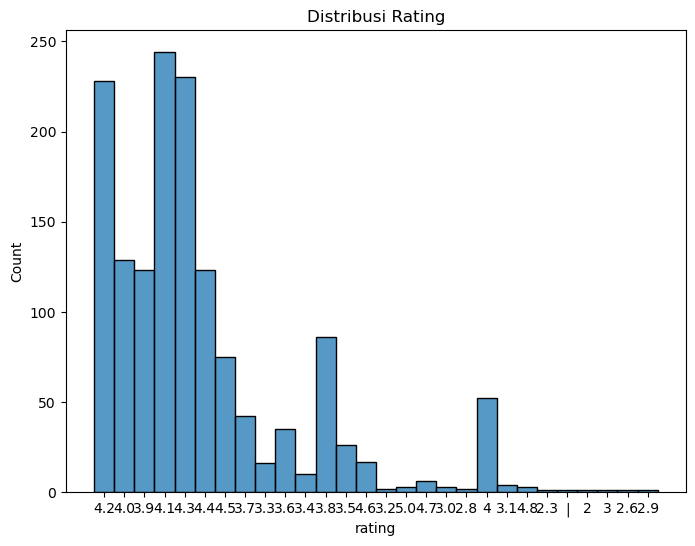

In [51]:
# Distribusi Rating
plt.figure(figsize=(8,6))
sns.histplot(df_cleaned['rating'], bins=10)
plt.title('Distribusi Rating')
plt.show()

C:\Users\yulia\AppData\Local\Temp\ipykernel_2216\1657303306.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].corr(),


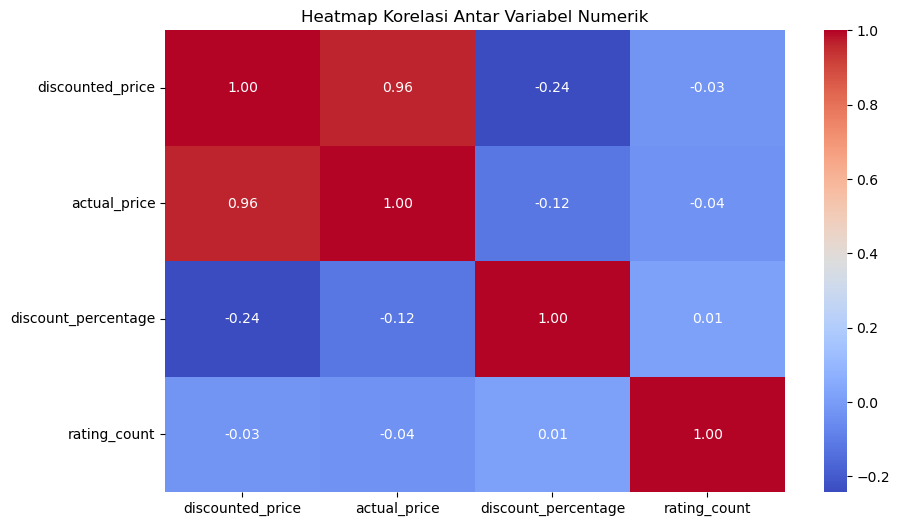

In [52]:
# Heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].corr(), 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

Features Engineering

In [53]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_id                1465 non-null   object 
 1   product_name              1465 non-null   object 
 2   category                  1465 non-null   object 
 3   discounted_price          1465 non-null   float64
 4   actual_price              1465 non-null   float64
 5   discount_percentage       1465 non-null   float64
 6   rating                    1465 non-null   object 
 7   rating_count              1465 non-null   float64
 8   about_product             1465 non-null   object 
 9   discounted_price_encoded  1465 non-null   int32  
dtypes: float64(4), int32(1), object(5)
memory usage: 108.9+ KB


In [54]:
le_product_name = LabelEncoder()
le_category = LabelEncoder()
le_about_product = LabelEncoder()
le_product_id = LabelEncoder()

df_cleaned['product_id'] = le_product_name.fit_transform(df_cleaned['product_id'])
df_cleaned['product_name'] = le_product_name.fit_transform(df_cleaned['product_name'])
df_cleaned['category'] = le_category.fit_transform(df_cleaned['category'])
df_cleaned['about_product'] = le_about_product.fit_transform(df_cleaned['about_product'])

df_cleaned['discounted_price'] = df_cleaned['discounted_price'].astype(int)
df_cleaned['actual_price'] = df_cleaned['actual_price'].astype(int)
df_cleaned['discount_percentage'] = df_cleaned['discount_percentage'].astype(int)
df_cleaned['rating'] = pd.to_numeric(df_cleaned['rating'], errors='coerce')
df_cleaned['rating'] = df_cleaned['rating'].fillna(0).round().astype(int)
df_cleaned['rating_count'] = df_cleaned['rating_count'].astype(int)

In [55]:
df_cleaned.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,discounted_price_encoded
0,346,1158,10,399,1099,64,4,24269,474,39900
1,848,134,10,199,349,43,4,43994,279,19900
2,819,1023,10,199,1899,90,4,7928,1250,19900
3,643,1264,10,329,699,53,4,94363,1010,32900
4,588,829,10,154,399,61,4,16905,1189,15400


## Model Implementation

1. KNN

In [56]:
df_cleaned['high_rating'] = (df_cleaned['rating'] >= 4).astype(int)

In [57]:
# Fitur dan target
X = df_cleaned[['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']]
y = df_cleaned['high_rating']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, max_depth=10, min_samples_split=5, min_samples_leaf=2)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [60]:
y_pred = model.predict(X_test)
print("Model accuracy score with criterion entropy:{:0.4f}".format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion entropy:0.9727


In [61]:
# d. Check for overfitting and underfitting
print("Training set score: {:0.4f}".format(model.score(X_train, y_train)))
print("Test set score: {:0.4f}".format(model.score(X_test, y_test)))

Training set score: 0.9753
Test set score: 0.9727


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.97      1.00      0.99       285

    accuracy                           0.97       293
   macro avg       0.49      0.50      0.49       293
weighted avg       0.95      0.97      0.96       293



c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Associant Rules** - APRIORI

In [64]:
from mlxtend.frequent_patterns import apriori, association_rules

# Binarisasi kategori dan diskon
df_cleaned['high_discount'] = (df_cleaned['discount_percentage'] >= 30).astype(int)
df_cleaned['high_rating'] = (df_cleaned['rating'] >= 4).astype(int)

In [65]:
# Data transaksi
transactions = df_cleaned[['category', 'high_discount', 'high_rating']].copy()
transactions = pd.get_dummies(transactions, columns=['category'])


In [66]:

# Apriori
frequent_itemsets = apriori(transactions, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
frequent_itemsets.head(35)

c:\Users\yulia\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.773379,(high_discount)
1,0.970648,(high_rating)
2,0.159044,(category_10)
3,0.746075,"(high_rating, high_discount)"
4,0.147440,"(high_discount, category_10)"
5,0.156997,"(high_rating, category_10)"
6,0.145392,"(high_rating, high_discount, category_10)"


In [67]:
# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(transactions, min_support=0.02, use_colnames=True)

# Step 2: Generate association rules based on the lift metric
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 3: Display the first few rules
rules.head()

c:\Users\yulia\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(high_discount),(category_10),0.773379,0.159044,0.147440,0.190644,1.198686,0.024439,1.039043,0.731412
1,(category_10),(high_discount),0.159044,0.773379,0.147440,0.927039,1.198686,0.024439,3.106043,0.197101
2,(high_discount),(category_76),0.773379,0.035495,0.032082,0.041483,1.168698,0.004631,1.006247,0.636952
3,(category_76),(high_discount),0.035495,0.773379,0.032082,0.903846,1.168698,0.004631,2.356860,0.149659
4,(category_93),(high_discount),0.033447,0.773379,0.032765,0.979592,1.266639,0.006897,11.104437,0.217794


**Conclusion for KNN and Apriori Analysis**
1. KNN (Classification for High Ratings)
The K-Nearest Neighbors (KNN) model was used to predict whether a product has a "high rating" (rating ≥ 4). Here are the key takeaways:

- Accuracy: The model achieved a test accuracy of 97.27%, indicating strong predictive performance on unseen data.
- Class Imbalance Issue:
The dataset had a significant imbalance between high-rating products (class 1) and low-rating products (class 0).
This resulted in poor performance for class 0, as seen in the precision, recall, and F1-score (0.00).
- Overfitting: The model achieved 97.53% accuracy on the training data. This indicates the model has learned the patterns in the training dataset well.

Business Insights:

High ratings are associated with specific patterns in discounted price, actual price, discount percentage, and rating count.
To improve model performance for low-rated products, consider addressing the class imbalance issue.


2. Apriori (Association Rules for Product Categories)
The Apriori algorithm was used to find patterns and associations between product categories, discounts, and ratings. Key results include:

- Frequent Itemsets:

Products with high discounts (discount_percentage ≥ 30%) were common, with 77.34% support.
High ratings (rating ≥ 4) were even more frequent, with 97.06% support.
- Association Rules:

Example Rule 1: {high_discount} → {category_10}

Support: 14.74%
Confidence: 19.06%
Lift: 1.20
Interpretation: Products with high discounts are 1.2 times more likely to belong to category_10 compared to random chance.
Example Rule 2: {category_10} → {high_discount}

Support: 14.74%
Confidence: 92.70%
Lift: 1.20
Interpretation: Products in category_10 have a 92.7% likelihood of having a high discount.

Business Insights:

Discounts play a critical role in driving high ratings and sales in specific categories.
Products in categories like category_10 are more likely to be associated with high discounts and high ratings.
Focus marketing and pricing strategies on high-performing categories and ensure competitive discounts.


**Overall Recommendations**

For KNN:

Use the model to identify features contributing to high ratings.
Address class imbalance to improve predictions for low-rated products.
Explore alternative models like Random Forest with tuned hyperparameters.

For Apriori:

Use association rules to design targeted promotions for specific product categories.
Prioritize discounts on products that already have high ratings to boost sales further.